## Title :
Exercise: Visualizing a Decision Tree

## Description :
The aim of this exercise is to visualize the decision tree that is created when performing Decision Tree Classification or Regression. The tree will look similar to the one given below.

<img src="./fig1.png" style="background-color:white;width:1300px;" >

## Data Description:
We are trying to predict the winner of the 2016 Presidential election (Trump vs. Clinton) in each county in the US.  To do this, we will consider several predictors including  minority: the percentage of residents that are minorities and bachelor: the percentage of resident adults with a bachelor's degree (or higher). 

## Instructions:

- Read the datafile `county_election_train.csv` into a Pandas data frame.
- Create the response variable based on the columns `trump` and `clinton`.
- Initialize a Decision Tree classifier of depth 3 and fit on the training data.
- Visualise the Decision Tree.

## Hints: 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.DecisionTreeClassifier()</a>Generates a Logistic Regression classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit" target="_blank">classifier.fit()</a>Build a decision tree classifier from the training set (X, y).

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank">plt.scatter()</a>A scatter plot of y vs. x with varying marker size and/or color.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html" target="_blank">plt.xlabel()</a>Set the label for the x-axis.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html" target="_blank">plt.ylabel()</a>Set the label for the y-axis.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html" target="_blank">plt.legend()</a>Place a legend on the Axes.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html" target="_blank">tree.plot_tree()</a>Plot a decision tree.

**Note: This exercise is auto-graded and you can try multiple attempts. **

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)


In [4]:
# Read the datafile "county_election_train.csv" as a Pandas dataframe
elect_train = pd.read_csv("../DATA/county_election_train.csv")

# Read the datafile "county_election_test.csv" as a Pandas dataframe
elect_test = pd.read_csv("../DATA/county_election_test.csv")

# Take a quick look at the dataframe
elect_train.head()


,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,trump,clinton,votergap
0,Alabama,1001,Autauga County,50756,2.842,22.733,51.475,5.2,54366,13.8,21.9,28.6,34.1,91.8,186.5,73.436,23.957,49.479
1,Alabama,1003,Baldwin County,179878,4.550,12.934,51.261,5.5,49626,11.0,28.6,22.3,27.4,114.6,229.4,77.351,19.565,57.786
2,Alabama,1007,Bibb County,21587,2.409,23.930,46.110,6.6,39546,22.1,10.2,33.9,40.3,36.8,230.3,76.966,21.422,55.544
3,Alabama,1009,Blount County,58345,8.954,4.229,50.592,5.4,45567,21.9,12.3,28.0,34.6,88.9,205.3,89.852,8.470,81.382
4,Alabama,1011,Bullock County,10985,7.526,72.831,45.241,7.8,26580,34.5,14.1,31.7,43.0,17.5,211.2,24.229,75.090,-50.862


In [ ]:
### edTest(test_response) ###

# Creating the response variable

# Set all the rows in the train data where "trump" value is more than "clinton" as 1
y_train = np.where(elect_train['trump'] > elect_train['clinton'],'1','0')


# Set all the rows in the test data where "trump" value is more than "clinton" as 1
y_test = np.where(elect_test['trump'] > elect_test['clinton'],'1','0')


(2620, 1)

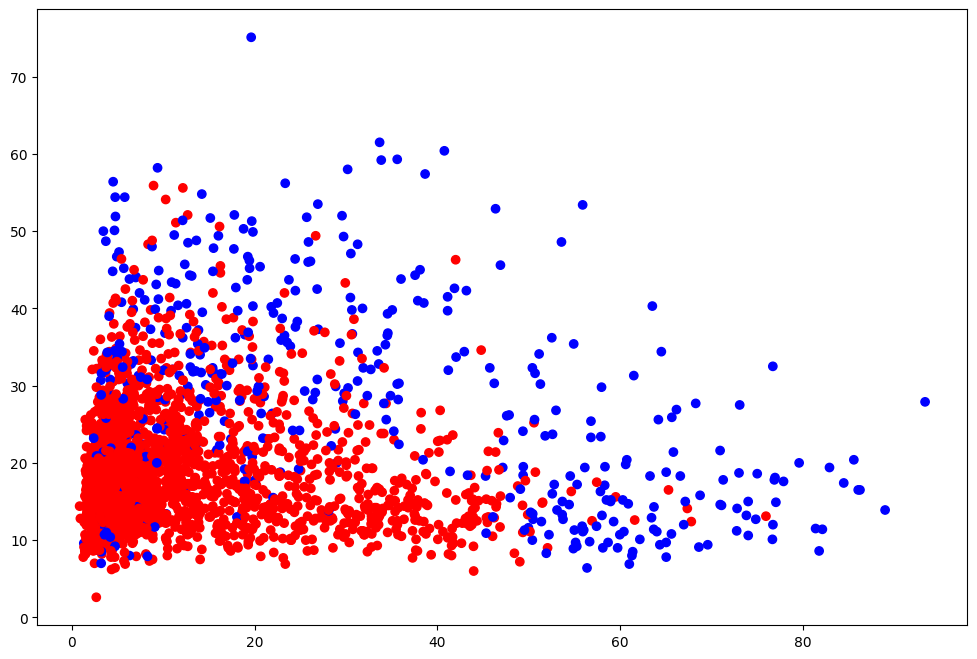

In [32]:
# Plot "minority" vs "bachelor" as a scatter plot
# Set colours blue for Trump and green for Clinton

vote_train = pd.DataFrame(y_train.reshape(-1,1),columns=['won'])

# Your code here
plt.scatter(elect_train['minority'],elect_train['bachelor'],c=['r' if vote_result == '1' else 'b' for vote_result in vote_train['won']])

vote_train.head()
vote_train.shape

In [39]:
# Initialize a Decision Tree classifier of depth 3 and choose 
# splitting criteria to be the gini
dtree = DecisionTreeClassifier(max_depth=3,criterion='gini')

# Fit the classifier on the train data
# but only use the minority column as the predictor variable
x = elect_train[['minority']]
y = vote_train['won']
dtree.fit(x,y)


DecisionTreeClassifier(max_depth=3)

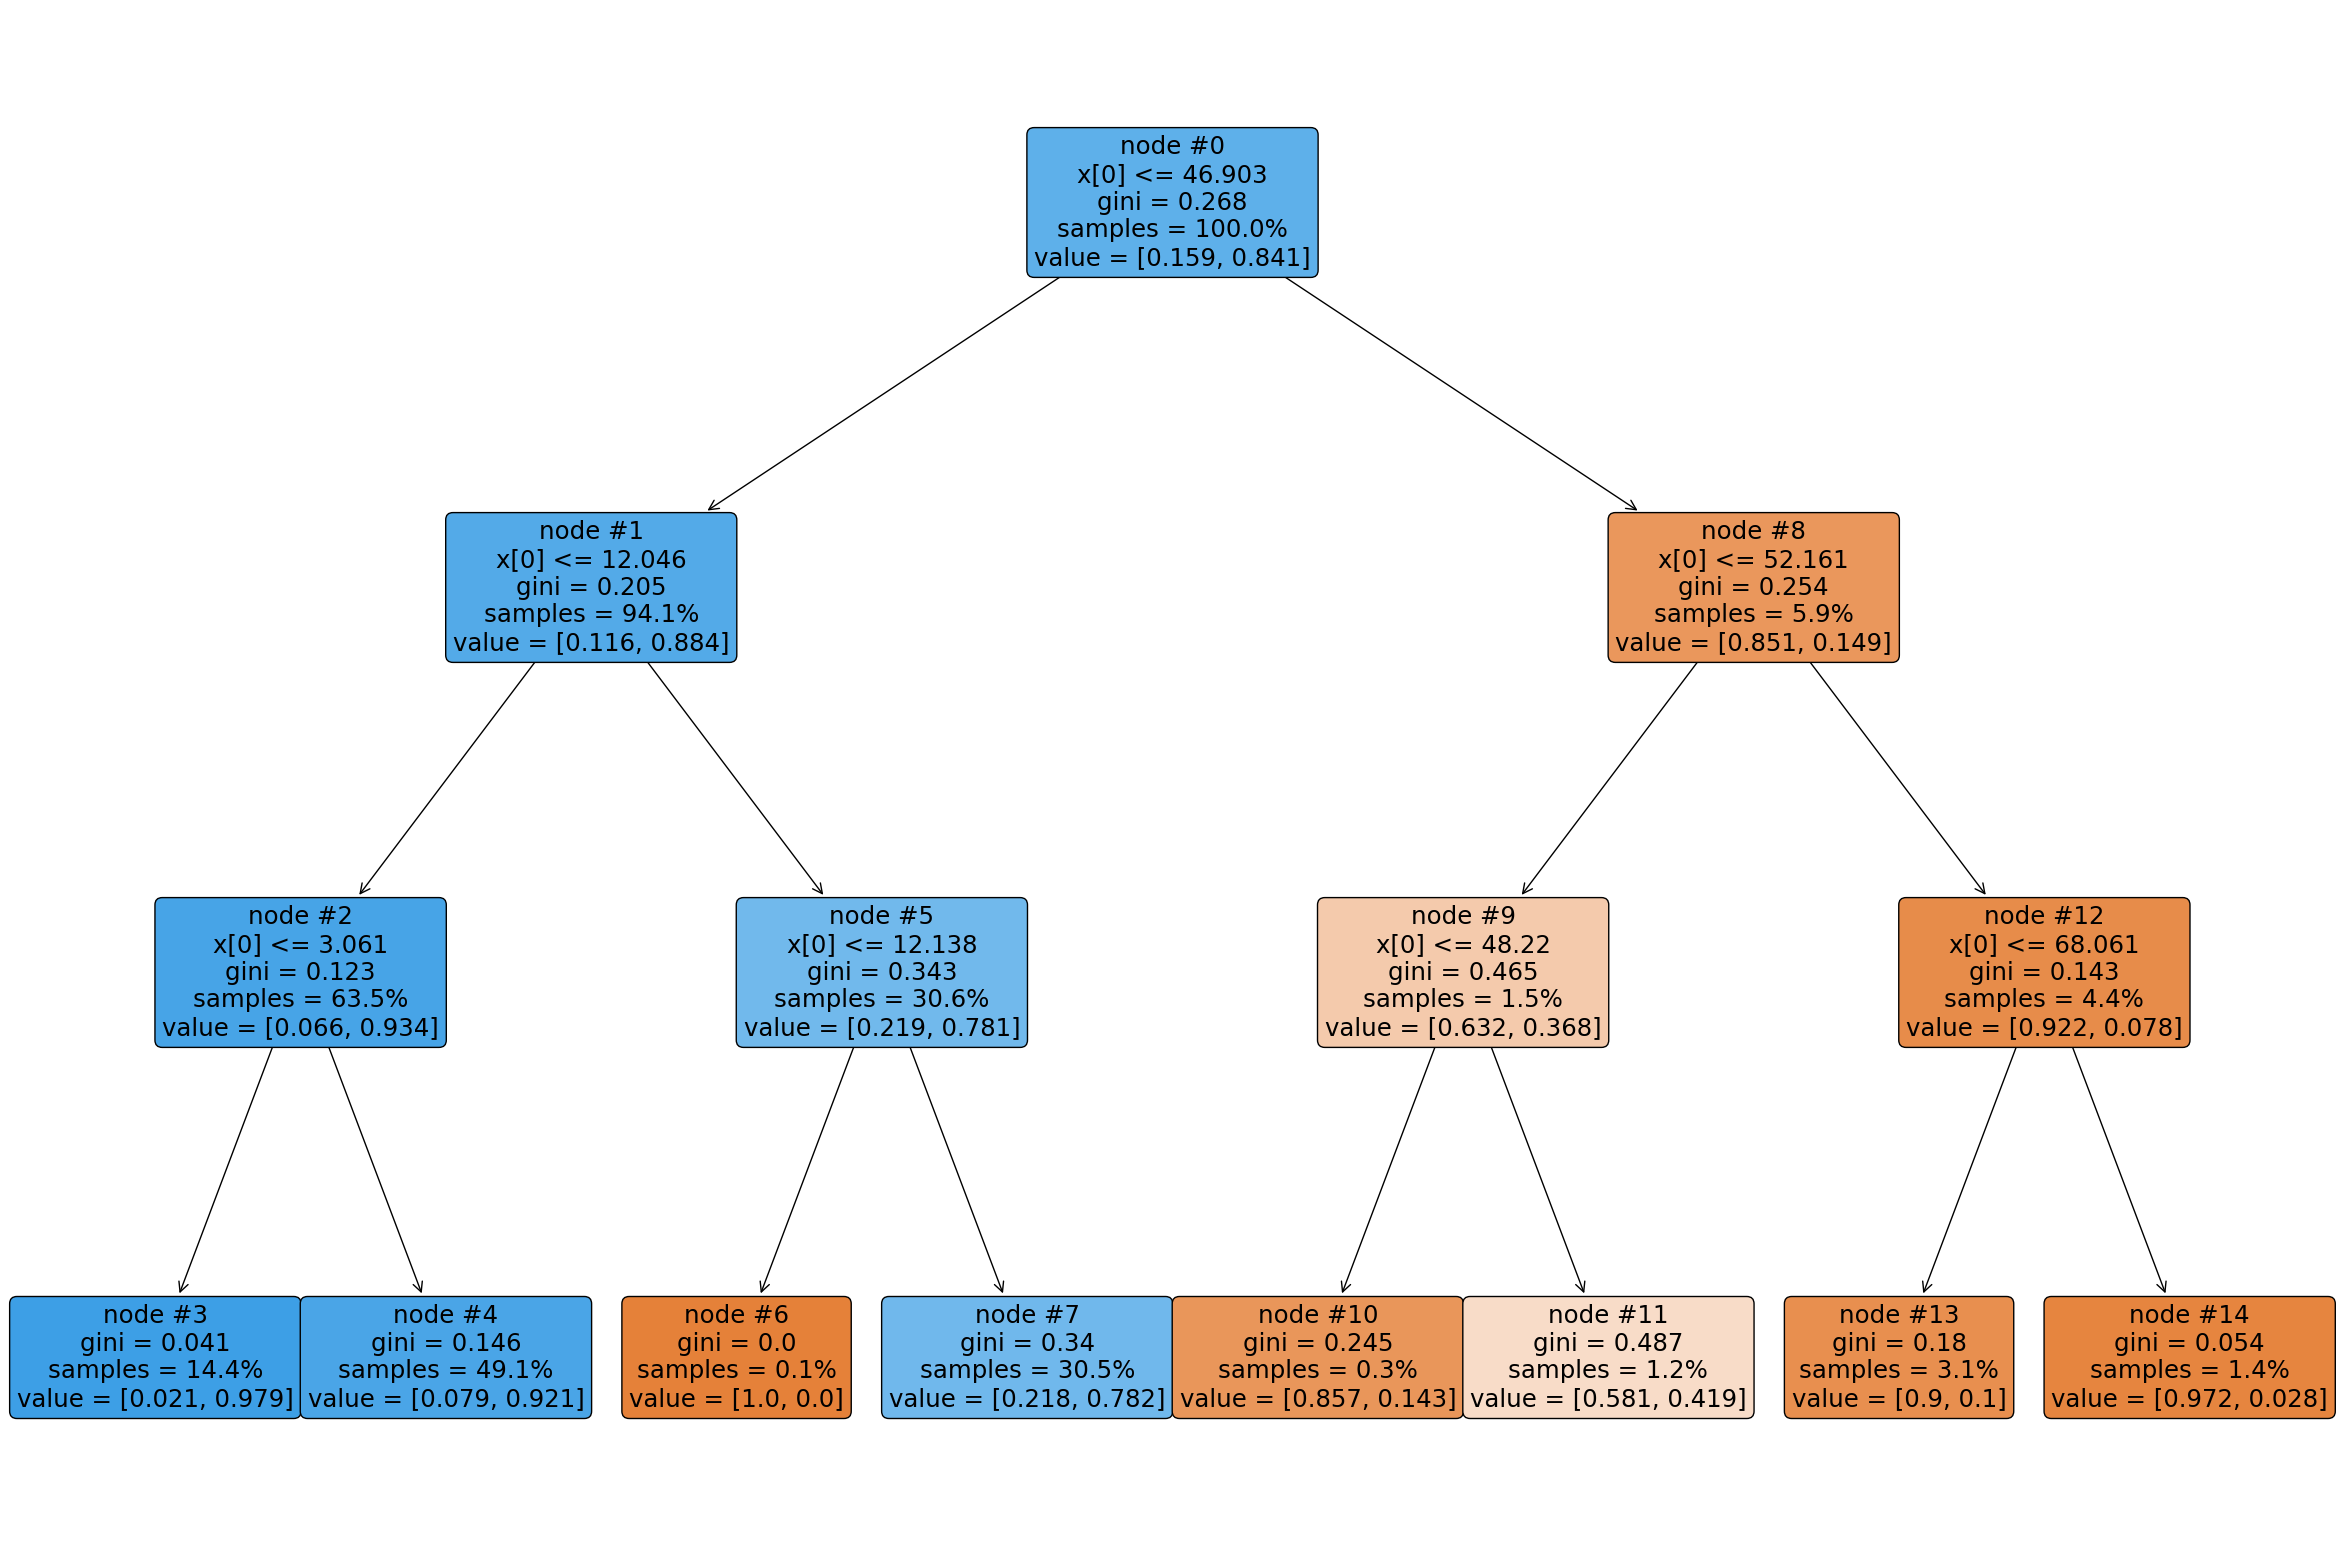

In [42]:
# Code to set the size of the plot
plt.figure(figsize=(30,20))

# Plot the Decision Tree trained above with parameters filled as True
tree.plot_tree(decision_tree=dtree,filled=True,impurity=True,node_ids=True,proportion=True,rounded=True)


plt.show();
